In [15]:
import pandas as pd
import matplotlib.pyplot as plt


def plot_measured_vs_theoretical_time(csv_path: str, input_file_name: str):
    """
    Plots measured vs theoretical execution time (T1/p) for a specific input file.

    Parameters:
    - csv_path (str): Path to the CSV file.
    - input_file_name (str): Name of the input file (e.g., "5nodos.txt").

    Returns:
    - None (displays the plot).
    """
    # Load CSV
    df = pd.read_csv(csv_path)

    # Filter by the selected input file
    filtered_df = df[df["nodos"] == input_file_name]

    if filtered_df.empty:
        raise ValueError(f"No data found for {input_file_name} in {csv_path}")

    # Group by number of threads and calculate mean execution time
    grouped = filtered_df.groupby("threads")["time_seconds"].mean().reset_index()

    # Get T1 (execution time with 1 thread)
    t1_row = grouped[grouped["threads"] == 1]
    if t1_row.empty:
        raise ValueError("No record found for threads=1 (T1)")

    t1 = float(t1_row["time_seconds"].values[0])
    grouped["theoretical_time"] = t1 / grouped["threads"]
    
    # Plot
    plt.figure(figsize=(8, 5))
    plt.plot(grouped["threads"], grouped["time_seconds"], 'o-', label="Measured Time (Tₚ)")
    plt.plot(grouped["threads"], grouped["theoretical_time"], 's--', label="Theoretical Time (T₁/p)")

    plt.title(f"Measured vs Theoretical Time\nFile: {input_file_name}")
    plt.xlabel("Number of Threads / Processes (p)")
    plt.ylabel("Execution Time (seconds)")
    plt.xticks(grouped["threads"])
    plt.legend()
    plt.tight_layout()
    plt.show()


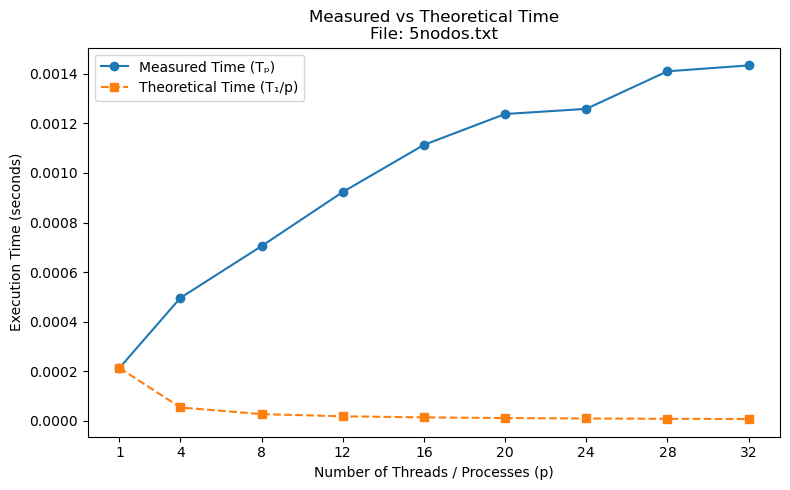

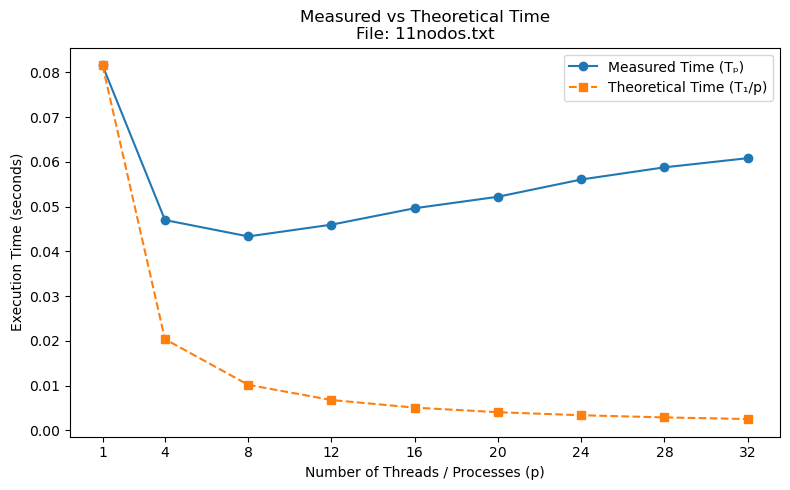

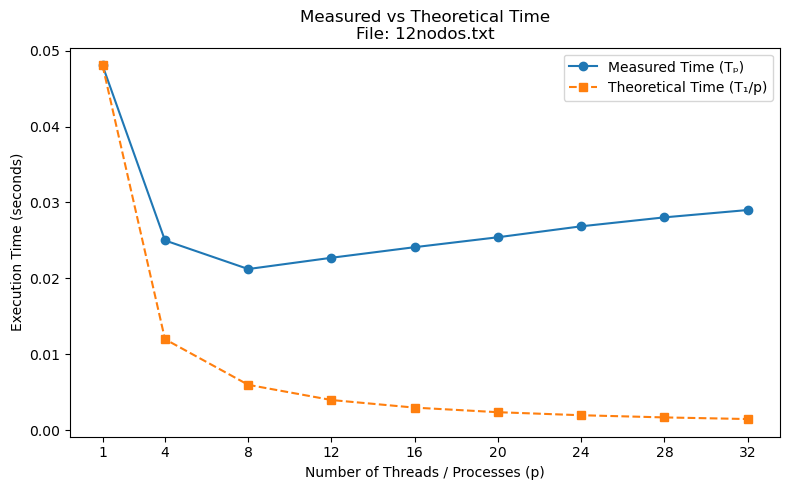

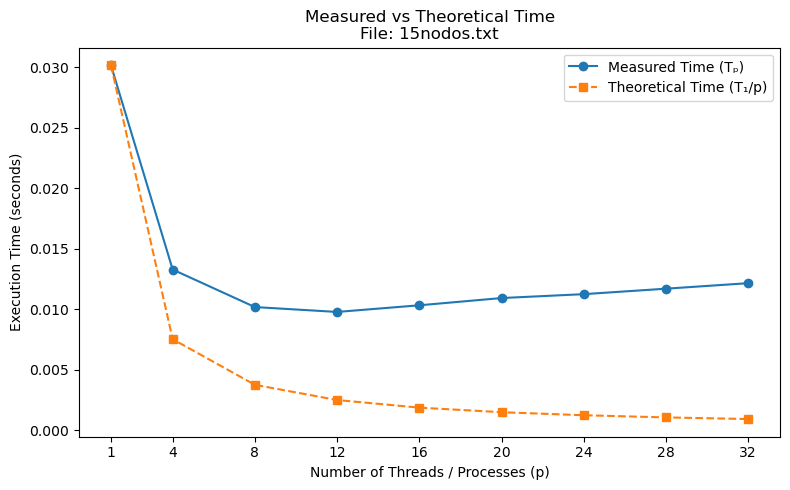

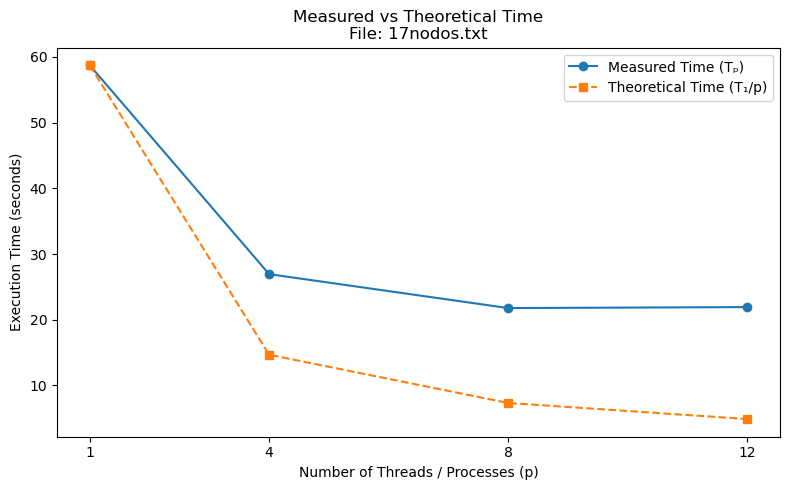

In [16]:
plot_measured_vs_theoretical_time(csv_path="output.csv", input_file_name="5nodos.txt")
plot_measured_vs_theoretical_time(csv_path="output.csv", input_file_name="11nodos.txt")
plot_measured_vs_theoretical_time(csv_path="output.csv", input_file_name="12nodos.txt")
plot_measured_vs_theoretical_time(csv_path="output.csv", input_file_name="15nodos.txt")
plot_measured_vs_theoretical_time(csv_path="output.csv", input_file_name="17nodos.txt")